Populating the interactive namespace from numpy and matplotlib


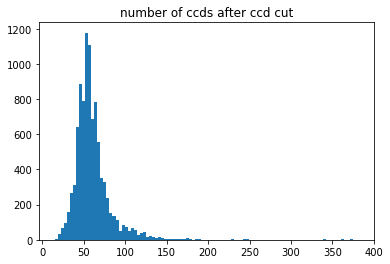

In [135]:
%pylab inline
WorkDir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/obiwan_run/brickstat/elg_new_ccd_list/'
fn_ccd_num = 'BrickccdNum.txt'
#fn_run_time = 
import matplotlib.pyplot as plt
import numpy as np
ccd_num = np.loadtxt(WorkDir+fn_ccd_num,dtype=np.str).transpose()
#run_time = np.loadtxt(WorkDir+fn_run_time,dtype=np.str).transpose()

#a plot of num distribution of ccds
num_hist = np.array([int(num) for num in ccd_num[1]])
plt.hist(num_hist,bins=100)
plt.title('number of ccds after ccd cut')
#and a plot of 3d distribution of ccds
def brickname2radec(brickname):
    ra_f = int(brickname[0:3])
    ra_b = int(brickname[3])
    ra = ra_f+0.1*ra_b
    dec_f = int(brickname[5:7])
    dec_b = int(brickname[7])
    dec = dec_f + dec_b*0.1
    if brickname[4] == 'm':
        dec = dec*(-1)
    return ra,dec

In [136]:
radecs = map(brickname2radec,ccd_num[0])

Text(0.5,1,'ccd density per brick (chunk 22)')

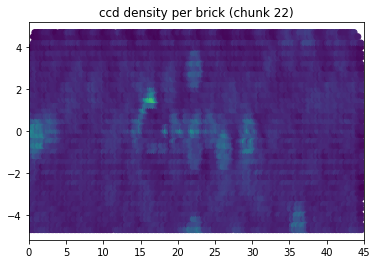

In [137]:
ra_dec = np.array(radecs).transpose()
ra = ra_dec[0]
dec = ra_dec[1]
plt.scatter(ra,dec,c=num_hist)
plt.gca().set_xlim((0,45))
plt.title('ccd density per brick (chunk 22)')

Text(0.5,1,'ccd density per brick (chunk 21)')

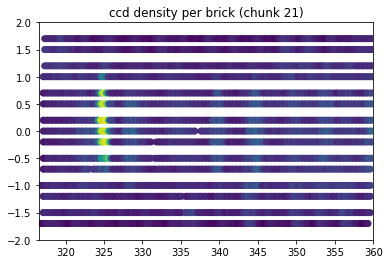

In [138]:
plt.scatter(ra,dec,c=num_hist)
plt.gca().set_xlim((316.5,360))
plt.gca().set_ylim((-2,2))
plt.title('ccd density per brick (chunk 21)')

In [141]:
#timing
fn_bricktiming = 'BrickTiming.txt'
bricktiming = np.loadtxt(WorkDir+fn_bricktiming,dtype=np.str).transpose()

In [142]:
def brick_match():
    #match ccd number to timing
    match_list = []
    for i in range(len(bricktiming[0])):
        for j in range(len(ccd_num[0])):
            if bricktiming[0][i] == ccd_num[0][j]:
                index = j
        match_list.append([bricktiming[0][i],bricktiming[1][i],ccd_num[1][index]])
    return match_list

In [143]:
match_list = brick_match()

Text(0,0.5,'obiwan run time (hrs)')

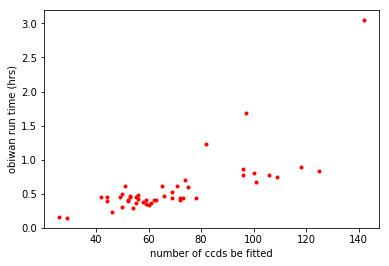

In [144]:
match_list = np.array(match_list,dtype = np.str)
CCD_NUM = [int(i) for i in match_list[:,2]]
RUN_TIME = [float(i) for i in match_list[:,1]]
data_set = np.array(zip(CCD_NUM,RUN_TIME)).transpose()
plt.plot(data_set[0],data_set[1],'r.')
plt.xlabel('number of ccds be fitted')
plt.ylabel('obiwan run time (hrs)')

In [145]:
#averge time for each brick to get finished (in hrs for 0.5 Node -- 24 hrs of computing time)
data_set[1].mean()

0.5861431874999999